# Gensim Model

<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gensim-Model" data-toc-modified-id="Gensim-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gensim Model</a></span><ul class="toc-item"><li><span><a href="#Daten-einlesen,-wählen-und-vorbereiten-" data-toc-modified-id="Daten-einlesen,-wählen-und-vorbereiten--1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Daten einlesen, wählen und vorbereiten <a name="introduction"></a></a></span></li><li><span><a href="#Gensim-Modell-vorbereiten-" data-toc-modified-id="Gensim-Modell-vorbereiten--1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gensim Modell vorbereiten <a name="paragraph0"></a></a></span></li><li><span><a href="#Topic-Modelling-aller-Daten-mit-raw-text-" data-toc-modified-id="Topic-Modelling-aller-Daten-mit-raw-text--1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Topic Modelling aller Daten mit raw text <a name="paragraph1"></a></a></span><ul class="toc-item"><li><span><a href="#Unigramm-" data-toc-modified-id="Unigramm--1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Unigramm <a name="subparagraph1"></a></a></span></li><li><span><a href="#Bigramm-" data-toc-modified-id="Bigramm--1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Bigramm <a name="subparagraph2"></a></a></span></li><li><span><a href="#Trigramm-" data-toc-modified-id="Trigramm--1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Trigramm <a name="subparagraph3"></a></a></span></li></ul></li><li><span><a href="#Topic-Modelling-aller-Daten-mit-POS-" data-toc-modified-id="Topic-Modelling-aller-Daten-mit-POS--1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Topic Modelling aller Daten mit POS <a name="paragraph2"></a></a></span><ul class="toc-item"><li><span><a href="#Unigramm--" data-toc-modified-id="Unigramm---1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Unigramm  <a name="subparagraph4"></a></a></span></li><li><span><a href="#Bigramm-" data-toc-modified-id="Bigramm--1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Bigramm <a name="subparagraph5"></a></a></span></li><li><span><a href="#Trigramm-" data-toc-modified-id="Trigramm--1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Trigramm <a name="subparagraph6"></a></a></span></li></ul></li><li><span><a href="#Topic-Modelling-der-vier-besten-Genres--" data-toc-modified-id="Topic-Modelling-der-vier-besten-Genres---1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Topic Modelling der vier besten Genres  <a name="paragraph"></a></a></span><ul class="toc-item"><li><span><a href="#Unigramm-" data-toc-modified-id="Unigramm--1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Unigramm <a name="subparagraph7"></a></a></span></li><li><span><a href="#Bigramm-" data-toc-modified-id="Bigramm--1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Bigramm <a name="subparagraph8"></a></a></span></li></ul></li><li><span><a href="#Ergebnisse-erkunden-" data-toc-modified-id="Ergebnisse-erkunden--1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Ergebnisse erkunden <a name="paragraph4"></a></a></span><ul class="toc-item"><li><span><a href="#Dominante-Topics-pro-Song" data-toc-modified-id="Dominante-Topics-pro-Song-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Dominante Topics pro Song</a></span></li><li><span><a href="#Repräsentativstes-Dokument-pro-Topic" data-toc-modified-id="Repräsentativstes-Dokument-pro-Topic-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Repräsentativstes Dokument pro Topic</a></span></li></ul></li></ul></li></ul></div>

In [1]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim
from gensim.models import Phrases

from gensim.models.phrases import Phraser
import pandas as pd

from collections import Counter

https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

## Daten einlesen, wählen und vorbereiten <a name="introduction"></a>

In [2]:
df = pd.read_csv('../../datasets/currently_dataset/song_decades_long.csv', index_col=[0])
df.head(1)

,artist,decades,text,stemmed_text,POS,Genre1,genre1,number_of_tokens,number_of_types
0,"""Weird Al"" Yankovic",1980s,potato skins potato cakes hash browns and i...,potato skin potato cake hash brown and instan...,french plain enough greasy sour lumpy tough en...,Rock,antiviral pop,12745.0,2264.0


In [3]:
data1 = df[df['Genre1'] == 'Jazz']
data2 = df[df['Genre1'] == 'Hip Hop']
data3 = df[df['Genre1'] == 'Electronic']
data4 = df[df['Genre1'] == 'Folk, World, & Country']
genres = pd.concat([data1, data2, data3, data4], axis=0)
genres.head(1)

,artist,decades,text,stemmed_text,POS,Genre1,genre1,number_of_tokens,number_of_types
786,Billie Holiday,1950s,heaven i'm in heaven and my heart beats so t...,heaven i 'm in heaven and my heart beat so th...,lucky much much much much heart happiness chee...,Jazz,adult standards,1074.0,266.0


## Gensim Modell vorbereiten <a name="paragraph0"></a>

In [4]:
def create_docs(df, column):
    docs = []
    for i, row in df.iterrows():
        text = row[column].split()
        docs.append(text)
    return docs

In [5]:
def build_dictionary(docs):
    dictionary = Dictionary(docs)
    dictionary.filter_extremes(no_below=20, no_above=0.5)
    corpus = [dictionary.doc2bow(doc) for doc in docs]
    return dictionary, corpus

In [6]:
def build_model(docs, num_topics=8, chunksize=2000, passes=20, iterations=400, eval_every=None):
    dictionary, corpus = build_dictionary(docs)
    
    temp = dictionary[0] 
    id2word = dictionary.id2token

    model = LdaModel(
        corpus=corpus,
        id2word=id2word,
        chunksize=chunksize,
        alpha='auto',
        eta='auto',
        iterations=iterations,
        num_topics=num_topics,
        passes=passes,
        eval_every=eval_every
    )
    return model, dictionary, corpus

In [7]:
# top_topics = model.top_topics(corpus) #, num_words=20)

# # Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
# avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
# print('Average topic coherence: %.4f.' % avg_topic_coherence)

# pprint(top_topics)

In [8]:
def visualise_LDA(model, corpus, dictionary):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)

In [9]:
def bi_trigramm(df, column):
    bigram_text= []
    for i, row in df.iterrows():
        text = row[column].split()
        bigram_text.append(text)

    bigram = Phrases(bigram_text, min_count=2, threshold=10) # höherer threshold für weniger phrases.
    trigram = Phrases(bigram[docs], threshold=10)  

    bigram_mod = Phraser(bigram)
    trigram_mod = Phraser(trigram)
    return bigram_text, bigram_mod, trigram_mod

## Topic Modelling aller Daten mit raw text <a name="paragraph1"></a>

### Unigramm <a name="subparagraph1"></a>

In [10]:
docs = create_docs(df, 'text')
model, dictionary, corpus = build_model(docs)

In [11]:
print('Unique tokens: %d' % len(dictionary))
print('Documents: %d' % len(corpus))
pprint(model.print_topics())

Unique tokens: 4817
Documents: 1038
[(0,
  '0.004*"roll" + 0.003*"went" + 0.003*"road" + 0.003*"blue" + 0.003*"sweet" + '
  '0.003*"rain" + 0.003*"money" + 0.003*"saw" + 0.003*"woman" + 0.003*"lord"'),
 (1,
  '0.041*"la" + 0.007*"christmas" + 0.003*"wanna" + 0.003*"sing" + 0.003*"die" '
  '+ 0.003*"nah" + 0.003*"line" + 0.003*"somebody" + 0.003*"burn" + '
  '0.003*"living"'),
 (2,
  '0.005*"because" + 0.004*"dance" + 0.004*"jump" + 0.004*"\'bout" + '
  '0.004*"brother" + 0.003*"\'em" + 0.003*"-" + 0.003*"." + 0.003*"cool" + '
  '0.003*"kill"'),
 (3,
  '0.006*"die" + 0.005*"blood" + 0.004*"dead" + 0.004*"death" + 0.003*"war" + '
  '0.003*"burn" + 0.003*"fear" + 0.003*"hell" + 0.003*"alive" + 0.003*"fight"'),
 (4,
  '0.015*"nigga" + 0.015*"ya" + 0.014*"fuck" + 0.014*"shit" + 0.010*"bitch" + '
  '0.009*"niggas" + 0.009*"money" + 0.008*"yo" + 0.006*"ass" + 0.006*"\'em"'),
 (5,
  '0.025*"wanna" + 0.006*"na" + 0.006*"ya" + 0.006*"let\'s" + 0.006*"ooh" + '
  '0.006*"la" + 0.005*"ah" + 0.004*"

In [12]:
# visualise_LDA(model, dictionary, corpus)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.006396 -0.026595       1        1  19.549021
3     -0.093161 -0.093144       2        1  16.515177
4      0.185767 -0.028952       3        1  15.388749
5     -0.014352  0.042632       4        1  14.953637
6     -0.111342  0.026017       5        1  12.816940
1     -0.032245 -0.014427       6        1   7.372521
2      0.061830 -0.026205       7        1   7.055934
7      0.009899  0.120674       8        1   6.348020, topic_info=           Term         Freq        Total Category  logprob  loglift
586          la  3838.000000  3838.000000  Default  30.0000  30.0000
748         ooh  3179.000000  3179.000000  Default  29.0000  29.0000
4641      nigga  2223.000000  2223.000000  Default  28.0000  28.0000
1119      wanna  5687.000000  5687.000000  Default  27.0000  27.0000
2623       fuck  2230.000000  2230.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
30           ah   241.892273  1823.236816   Topic8  -5.5211   0.7372
613       let's   253.266327  2345.622803   Topic8  -5.4751   0.5312
354   everybody   236.452362  2038.704224   Topic8  -5.5438   0.6027
1477       lord   219.595062  1718.755615   Topic8  -5.6178   0.6995
242       crazy   218.134415  1784.450562   Topic8  -5.6245   0.6553

[614 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4192      1  0.786637      "son
4192      2  0.144907      "son
4192      6  0.020701      "son
4192      8  0.020701      "son
9         1  0.191738     'bout
...     ...       ...       ...
1198      7  0.057488  yourself
1198      8  0.070359  yourself
4760      1  0.013755       yup
4760      3  0.962871       yup
4760      8  0.013755       yup

[3262 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 5, 6, 7, 2, 3, 8])

In [14]:
pyLDAvis.save_html(vis, '../../images/Bilder_Abschlusspräsi/lda_text_alles.html')

### Bigramm <a name="subparagraph2"></a>

In [26]:
bigram_text, bigram_mod, trigram_mod = bi_trigramm(df, 'text')

bigramme = [bigram_mod[doc] for doc in bigram_text]

model, dictionary, corpus = build_model(bigramme)

In [27]:
pprint(model.print_topics())

[(0,
  '0.004*"someone" + 0.003*"together" + 0.003*"wanna" + 0.003*"we\'ll" + '
  '0.003*"yes" + 0.003*"-" + 0.003*"dreams" + 0.003*"bring" + 0.003*"rain" + '
  '0.003*"lose"'),
 (1,
  '0.007*"god" + 0.007*"die" + 0.006*"blood" + 0.005*"dead" + 0.004*"death" + '
  '0.004*"fear" + 0.004*"coming" + 0.004*"must" + 0.003*"war" + 0.003*"men"'),
 (2,
  '0.032*"lord" + 0.016*"god" + 0.015*"sing" + 0.013*"jesus" + 0.010*"praise" '
  '+ 0.008*"yes" + 0.007*"forever" + 0.006*"song" + 0.006*"thank" + '
  '0.006*"music"'),
 (3,
  '0.017*"nigga" + 0.016*"shit" + 0.016*"fuck" + 0.016*"ya" + 0.011*"bitch" + '
  '0.009*"niggas" + 0.009*"money" + 0.006*"wanna" + 0.006*"hit" + 0.006*"yo"'),
 (4,
  '0.019*"la_la" + 0.017*"ya" + 0.009*"ooh" + 0.006*"ah" + 0.005*"honey" + '
  '0.005*"mi" + 0.005*"boy" + 0.005*"me." + 0.005*"sweet" + 0.004*"rock"'),
 (5,
  '0.009*"lord" + 0.008*"line" + 0.007*"beat" + 0.006*"can\'t_stop" + '
  '0.005*"dig" + 0.005*"sweet" + 0.005*"talk" + 0.005*"lonely" + 0.005*"woman" '
  

In [36]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.046072 -0.024459       1        1  26.086742
7     -0.042218  0.007113       2        1  21.516695
6     -0.016457 -0.002519       3        1  15.226318
3     -0.188722  0.073012       4        1  14.605099
1      0.061272 -0.014747       5        1  13.590294
4     -0.046362 -0.021741       6        1   5.472905
2      0.163147  0.110437       7        1   1.917823
5      0.023268 -0.127097       8        1   1.584124, topic_info=       Term         Freq        Total Category  logprob  loglift
1056  wanna  5612.000000  5612.000000  Default  30.0000  30.0000
4723  nigga  2087.000000  2087.000000  Default  29.0000  29.0000
1413   lord  1491.000000  1491.000000  Default  28.0000  28.0000
1121     ya  3747.000000  3747.000000  Default  27.0000  27.0000
2594    god  1982.000000  1982.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
113    body    44.758942  1415.101318   Topic8  -5.7133   0.6915
489   house    43.648209  1125.449097   Topic8  -5.7385   0.8954
704    once    43.278675  1214.338501   Topic8  -5.7470   0.8108
727     pay    41.952412   933.957458   Topic8  -5.7781   1.0422
705     ooh    42.683990  1926.532104   Topic8  -5.7608   0.3355

[614 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1         1  0.132037  'bout
1         2  0.165047  'bout
1         3  0.087547  'bout
1         4  0.475048  'bout
1         5  0.014352  'bout
...     ...       ...    ...
1131      4  0.022310   you.
1131      5  0.203977   you.
1131      6  0.198665   you.
1131      7  0.032934   you.
1131      8  0.028684   you.

[3067 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 8, 7, 4, 2, 5, 3, 6])

### Trigramm <a name="subparagraph3"></a>

In [43]:
trigramme = [trigram_mod[bigram_mod[doc]] for doc in bigram_text]

model, dictionary, corpus = build_model(trigramme)

In [44]:
pprint(model.print_topics())

[(0,
  '0.014*"ya" + 0.013*"nigga" + 0.013*"shit" + 0.013*"fuck" + 0.009*"bitch" + '
  '0.008*"money" + 0.007*"wanna" + 0.007*"niggas" + 0.006*"hit" + '
  '0.005*"\'em"'),
 (1,
  '0.008*"wanna" + 0.007*"-" + 0.006*"boy" + 0.005*"oh_oh" + 0.005*"hey" + '
  '0.005*"bad" + 0.005*"ooh" + 0.004*"crazy" + 0.004*"beat" + 0.004*"talk"'),
 (2,
  '0.018*"ya" + 0.017*"wanna" + 0.005*"ooh" + 0.005*"sweet" + 0.005*"he\'ll" + '
  '0.005*"fine" + 0.005*"lord" + 0.004*"lovin\'" + 0.004*"sing" + '
  '0.004*"sometimes"'),
 (3,
  '0.008*"you." + 0.008*"lord" + 0.006*"me." + 0.004*"god" + 0.004*"yes" + '
  '0.003*"no_more" + 0.003*"sing" + 0.003*"must" + 0.003*"hope" + '
  '0.003*"help"'),
 (4,
  '0.005*"dead" + 0.005*"die" + 0.005*"blood" + 0.004*"god" + 0.004*"death" + '
  '0.003*"hell" + 0.003*"black" + 0.003*"kill" + 0.003*"they\'re" + '
  '0.003*"land"'),
 (5,
  '0.006*"woman" + 0.005*"town" + 0.005*"song" + 0.004*"honey" + 0.004*"yes" + '
  '0.004*"rock" + 0.004*"big" + 0.004*"money" + 0.004*"hey" +

In [45]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.058639  0.063577       1        1  19.339090
0      0.174688 -0.013974       2        1  17.672886
4     -0.006155 -0.084815       3        1  15.265329
1      0.005054  0.043454       4        1  12.288660
6     -0.066641 -0.037875       5        1  11.943243
5      0.033564 -0.032281       6        1  11.514912
3     -0.087170 -0.039568       7        1   8.628835
2      0.005300  0.101482       8        1   3.347048, topic_info=       Term         Freq        Total Category  logprob  loglift
1078  wanna  5430.000000  5430.000000  Default  30.0000  30.0000
1144     ya  3558.000000  3558.000000  Default  29.0000  29.0000
4893  nigga  2028.000000  2028.000000  Default  28.0000  28.0000
2648   fuck  2053.000000  2053.000000  Default  27.0000  27.0000
2761   shit  2107.000000  2107.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
665    move    86.945145  1551.729492   Topic8  -5.7941   0.5152
713   oh_oh    95.739037  2747.618652   Topic8  -5.6978   0.0402
583   let's    86.635277  1671.765869   Topic8  -5.7977   0.4372
226   crazy    84.388931  1549.767456   Topic8  -5.8239   0.4867
1125   wish    83.576241  1632.896606   Topic8  -5.8336   0.4247

[636 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1         1  0.047157    'em
1         2  0.488882    'em
1         3  0.075809    'em
1         4  0.103268    'em
1         5  0.033428    'em
...     ...       ...    ...
1158      4  0.104364  young
1158      5  0.080343  young
1158      6  0.121757  young
1158      7  0.053838  young
1158      8  0.025677  young

[3319 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 5, 2, 7, 6, 4, 3])

## Topic Modelling aller Daten mit POS <a name="paragraph2"></a>

### Unigramm  <a name="subparagraph4"></a>

In [46]:
docs = create_docs(df, 'POS')
model, dictionary, corpus = build_model(docs)

In [47]:
pprint(model.print_topics())

[(0,
  '0.014*"woman" + 0.010*"daddy" + 0.010*"lovin\'" + 0.010*"talkin" + '
  '0.009*"fun" + 0.009*"everybody" + 0.008*"dead" + 0.007*"dance" + '
  '0.007*"city" + 0.006*"run"'),
 (1,
  '0.008*"blood" + 0.008*"alive" + 0.007*"enough" + 0.007*"believe" + '
  '0.006*"death" + 0.006*"faith" + 0.006*"lonely" + 0.006*"dead" + '
  '0.005*"truth" + 0.005*"moment"'),
 (2,
  '0.010*"dirty" + 0.008*"wild" + 0.007*"wind" + 0.006*"summer" + '
  '0.006*"party" + 0.006*"blue" + 0.006*"ground" + 0.006*"verse" + '
  '0.006*"woman" + 0.006*"-"'),
 (3,
  '0.015*"somebody" + 0.008*"bar" + 0.007*"control" + 0.007*"nobody" + '
  '0.007*"truth" + 0.006*"chance" + 0.006*"sound" + 0.006*"anything" + '
  '0.006*"music" + 0.006*"try"'),
 (4,
  '0.014*"hot" + 0.012*"dance" + 0.012*"body" + 0.010*"music" + 0.010*"round" '
  '+ 0.009*"like" + 0.008*"money" + 0.008*"believe" + 0.007*"mine" + '
  '0.006*"rock"'),
 (5,
  '0.008*"wish" + 0.007*"crazy" + 0.007*"everybody" + 0.006*"hope" + '
  '0.006*"beautiful" + 0.00

In [48]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.032350 -0.013762       1        1  20.551083
7     -0.138413 -0.036524       2        1  19.049051
6      0.003984  0.067176       3        1  16.483994
1      0.120163 -0.022942       4        1  16.101553
4     -0.080258 -0.040177       5        1   7.584478
0     -0.025938  0.073380       6        1   6.866772
2      0.029090  0.061462       7        1   6.739910
3      0.059022 -0.088613       8        1   6.623163, topic_info=          Term         Freq        Total Category  logprob  loglift
1440      shit  2081.000000  2081.000000  Default  30.0000  30.0000
675      bitch  1606.000000  1606.000000  Default  29.0000  29.0000
2375     nigga  1221.000000  1221.000000  Default  28.0000  28.0000
1380      fuck  1026.000000  1026.000000  Default  27.0000  27.0000
526   somebody  1944.000000  1944.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
745      earth   115.295792   668.196411   Topic8  -5.6224   0.9575
1034    strong   126.253418  1154.724609   Topic8  -5.5316   0.5013
291      honey   121.228806  1072.322754   Topic8  -5.5722   0.5347
676      black   124.807716  1723.963013   Topic8  -5.5431   0.0890
642       wish   120.917084  1454.247192   Topic8  -5.5748   0.2275

[579 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2323      2  0.945147  'bout
2323      5  0.046674  'bout
0         1  0.286611      -
0         2  0.259917      -
0         3  0.085702      -
...     ...       ...    ...
658       4  0.125974  young
658       5  0.019986  young
658       6  0.053902  young
658       7  0.099931  young
658       8  0.031493  young

[2969 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 7, 2, 5, 1, 3, 4])

### Bigramm <a name="subparagraph5"></a>

In [49]:
bigram_text, bigram_mod, trigram_mod = bi_trigramm(df, 'POS')

bigramme = [bigram_mod[doc] for doc in bigram_text]

model, dictionary, corpus = build_model(bigramme)

In [50]:
pprint(model.print_topics())

[(0,
  '0.019*"shit" + 0.016*"nigga" + 0.015*"bitch" + 0.014*"money" + 0.009*"fuck" '
  '+ 0.009*"ass" + 0.006*"be" + 0.006*"real" + 0.006*"verse" + 0.006*"game"'),
 (1,
  '0.008*"truth" + 0.008*"have_have" + 0.007*"free_free" + 0.006*"many" + '
  '0.006*"hope" + 0.006*"land" + 0.005*"believe" + 0.005*"future" + '
  '0.005*"line" + 0.005*"everyone"'),
 (2,
  '0.008*"verse" + 0.008*"want_want" + 0.007*"wish" + 0.007*"little_little" + '
  '0.006*"hope" + 0.006*"anything" + 0.006*"truth" + 0.005*"feeling" + '
  '0.005*"chance" + 0.005*"keep"'),
 (3,
  '0.019*"blood" + 0.016*"death" + 0.009*"dead" + 0.009*"war" + 0.007*"fear" + '
  '0.006*"hell" + 0.006*"power" + 0.006*"land" + 0.005*"faith" + '
  '0.005*"black"'),
 (4,
  '0.017*"shit" + 0.014*"fuck" + 0.013*"bitch" + 0.011*"everybody" + '
  '0.011*"dead" + 0.010*"ass" + 0.009*"fucking" + 0.008*"hate" + '
  '0.006*"fuckin" + 0.006*"mouth"'),
 (5,
  '0.013*"want_want" + 0.010*"body" + 0.009*"music" + 0.009*"everybody" + '
  '0.008*"like" + 

In [51]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.012454 -0.006897       1        1  23.297382
2      0.042485 -0.077731       2        1  17.921242
0     -0.152089 -0.003294       3        1  17.503490
5     -0.027712 -0.071961       4        1  11.009704
7      0.026133 -0.058166       5        1  10.936763
1      0.113415 -0.003627       6        1   8.228924
3      0.099271  0.131719       7        1   7.034183
4     -0.113957  0.089958       8        1   4.068313, topic_info=       Term         Freq        Total Category  logprob  loglift
1454   shit  1695.000000  1695.000000  Default  30.0000  30.0000
656   bitch  1311.000000  1311.000000  Default  29.0000  29.0000
2518  nigga  1099.000000  1099.000000  Default  28.0000  28.0000
1383   fuck   871.000000   871.000000  Default  27.0000  27.0000
49    blood   984.000000   984.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
137   daddy    63.506744   793.033936   Topic8  -5.5417   0.6772
265     gun    60.586842   613.696411   Topic8  -5.5888   0.8865
193     eye    58.768875   655.009888   Topic8  -5.6192   0.7909
324    like    57.997383  1260.624512   Topic8  -5.6324   0.1230
396    next    56.791378   693.805176   Topic8  -5.6535   0.6991

[583 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1358      1  0.014317      -
1358      2  0.804154      -
1358      3  0.097835      -
1358      4  0.019090      -
1358      5  0.014317      -
...     ...       ...    ...
637       7  0.034484  young
637       8  0.016421  young
1255      1  0.815525    zoo
1255      3  0.090614    zoo
1255      5  0.045307    zoo

[2837 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 1, 6, 8, 2, 4, 5])

### Trigramm <a name="subparagraph6"></a>

In [52]:
trigramme = [trigram_mod[bigram_mod[doc]] for doc in bigram_text]

model, dictionary, corpus = build_model(trigramme)

In [53]:
pprint(model.print_topics())

[(0,
  '0.023*"shit" + 0.019*"bitch" + 0.017*"nigga" + 0.013*"money" + 0.013*"fuck" '
  '+ 0.010*"ass" + 0.006*"game" + 0.006*"be" + 0.006*"real" + 0.005*"wit"'),
 (1,
  '0.016*"verse" + 0.009*"like" + 0.009*"body" + 0.008*"wish" + 0.008*"-" + '
  '0.007*"boy" + 0.007*"bridge" + 0.006*"everybody" + 0.006*"try" + '
  '0.006*"nobody"'),
 (2,
  '0.005*"town" + 0.005*"dead" + 0.005*"boy" + 0.005*"woman" + 0.005*"money" + '
  '0.005*"bad" + 0.004*"everybody" + 0.004*"car" + 0.004*"house" + '
  '0.004*"room"'),
 (3,
  '0.010*"city" + 0.010*"boy" + 0.009*"woman" + 0.009*"line" + 0.008*"town" + '
  '0.008*"street" + 0.007*"hell" + 0.007*"rock_roll" + 0.007*"road" + '
  '0.007*"body"'),
 (4,
  '0.008*"town" + 0.007*"road" + 0.007*"rain" + 0.006*"morning" + 0.006*"boy" '
  '+ 0.005*"line" + 0.005*"blue" + 0.005*"bed" + 0.004*"street" + '
  '0.004*"music"'),
 (5,
  '0.010*"everybody" + 0.010*"boy" + 0.009*"honey" + 0.008*"hot" + '
  '0.007*"sweet" + 0.007*"somebody" + 0.007*"woman" + 0.006*"body"

In [54]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.028650  0.010989       1        1  20.842192
0      0.169475  0.009172       2        1  16.567253
2      0.040085  0.049569       3        1  14.028395
6     -0.108268 -0.063441       4        1  12.088304
1      0.004030 -0.103392       5        1  11.779581
7     -0.109176  0.073514       6        1  11.456117
5      0.033915 -0.045840       7        1  10.152318
3     -0.001410  0.069431       8        1   3.085846, topic_info=           Term         Freq        Total Category  logprob  loglift
1469       shit  1686.000000  1686.000000  Default  30.0000  30.0000
2603      nigga  1105.000000  1105.000000  Default  29.0000  29.0000
657       bitch  1310.000000  1310.000000  Default  28.0000  28.0000
1032      verse  1063.000000  1063.000000  Default  27.0000  27.0000
1397       fuck   865.000000   865.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
411        only    47.862720  1296.056152   Topic8  -5.5120   0.1796
29          bad    44.431160  1277.535400   Topic8  -5.5864   0.1196
322        like    43.974987  1222.883057   Topic8  -5.5967   0.1530
186   everybody    44.247398  1725.813843   Topic8  -5.5905  -0.1853
338         lot    42.152958   990.585327   Topic8  -5.6390   0.3214

[597 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1374      1  0.019518    -
1374      2  0.070751    -
1374      3  0.051234    -
1374      5  0.844137    -
1374      6  0.004879    -
...     ...       ...  ...
1269      1  0.092178  zoo
1269      2  0.092178  zoo
1269      3  0.691332  zoo
1269      6  0.092178  zoo
1269      7  0.046089  zoo

[2948 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 7, 2, 8, 6, 4])

## Topic Modelling der vier besten Genres  <a name="paragraph"></a>

### Unigramm <a name="subparagraph7"></a>

In [58]:
docs = create_docs(genres, 'POS')
model, dictionary, corpus = build_model(docs)

In [59]:
pprint(model.print_topics())

[(0,
  '0.032*"shit" + 0.025*"bitch" + 0.021*"nigga" + 0.016*"ass" + 0.013*"fuck" + '
  '0.010*"verse" + 0.007*"ice" + 0.007*"wit" + 0.007*"boom" + 0.007*"dog"'),
 (1,
  '0.022*"be" + 0.020*"shit" + 0.020*"bitch" + 0.018*"l" + 0.017*"fuck" + '
  '0.016*"yellow" + 0.015*"nigga" + 0.015*"hot" + 0.013*"weed" + 0.013*"lady"'),
 (2,
  '0.042*"talkin" + 0.030*"end" + 0.020*"woman" + 0.018*"mine" + 0.015*"tv" + '
  '0.014*"none" + 0.014*"someone" + 0.013*"river" + 0.013*"truth" + '
  '0.011*"tree"'),
 (3,
  '0.026*"fucking" + 0.024*"dog" + 0.022*"brother" + 0.018*"lie" + '
  '0.016*"food" + 0.015*"road" + 0.014*"fat" + 0.014*"funk" + 0.012*"dead" + '
  '0.010*"box"'),
 (4,
  '0.027*"shit" + 0.027*"bitch" + 0.027*"nigga" + 0.015*"fuck" + 0.011*"ass" + '
  '0.011*"white" + 0.009*"chorus" + 0.008*"g" + 0.008*"ride" + 0.008*"wit"'),
 (5,
  '0.019*"body" + 0.016*"enough" + 0.015*"party" + 0.014*"dead" + 0.013*"boom" '
  '+ 0.012*"like" + 0.010*"show" + 0.010*"floor" + 0.009*"wild" + '
  '0.008*"ro

In [60]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.115318  0.001857       1        1  24.702162
6      0.097702 -0.008190       2        1  22.796026
4     -0.145969 -0.015730       3        1  18.541927
7      0.014821  0.009876       4        1  13.439941
5     -0.013637 -0.043960       5        1   9.986705
3      0.105275 -0.156697       6        1   4.099594
1     -0.140232  0.081572       7        1   3.307613
2      0.197358  0.131272       8        1   3.126031, topic_info=       Term         Freq        Total Category  logprob  loglift
540    shit  1391.000000  1391.000000  Default  30.0000  30.0000
346   bitch  1248.000000  1248.000000  Default  29.0000  29.0000
488   nigga  1077.000000  1077.000000  Default  28.0000  28.0000
577  talkin   261.000000   261.000000  Default  27.0000  27.0000
433    fuck   678.000000   678.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
28     road    25.350101   351.385284   Topic8  -4.8153   0.8363
1     alone    17.247532   116.168808   Topic8  -5.2004   1.5580
130    fine    19.415583   200.936203   Topic8  -5.0820   1.1285
497   party    21.154627   329.169098   Topic8  -4.9962   0.7207
103    wild    18.933207   220.838516   Topic8  -5.1072   1.0089

[470 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
217       1  0.159607      about
217       3  0.159607      about
217       4  0.446901      about
217       5  0.159607      about
217       7  0.063843      about
...     ...       ...        ...
40        2  0.659916  yesterday
40        3  0.027496  yesterday
40        5  0.013748  yesterday
40        6  0.109986  yesterday
40        7  0.137482  yesterday

[2176 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 5, 8, 6, 4, 2, 3])

### Bigramm <a name="subparagraph8"></a>

In [122]:
bigram_text, bigram_mod, trigram_mod = bi_trigramm(genres, 'POS')

bigramme = [bigram_mod[doc] for doc in bigram_text]

model, dictionary, corpus = build_model(bigramme)

In [123]:
pprint(model.print_topics())

[(0,
  '0.028*"need_need" + 0.025*"want_want" + 0.017*"wind" + 0.015*"body" + '
  '0.015*"go_go" + 0.015*"music" + 0.014*"baby_baby" + 0.012*"end" + '
  '0.012*"day_day" + 0.011*"sky"'),
 (1,
  '0.010*"dream" + 0.008*"get_get" + 0.008*"road" + 0.008*"music" + '
  '0.007*"start" + 0.007*"come_come" + 0.006*"believe" + 0.006*"train" + '
  '0.006*"blue" + 0.006*"strong"'),
 (2,
  '0.011*"friend" + 0.008*"nobody" + 0.007*"blue" + 0.007*"year" + '
  '0.007*"today" + 0.007*"bed" + 0.007*"bar" + 0.006*"work" + 0.006*"sky" + '
  '0.006*"beer"'),
 (3,
  '0.021*"baby_baby" + 0.011*"tonight_tonight" + 0.009*"like" + 0.008*"top" + '
  '0.008*"music" + 0.007*"cool" + 0.007*"crazy" + 0.007*"move" + 0.007*"party" '
  '+ 0.007*"sound"'),
 (4,
  '0.027*"girl_girl" + 0.021*"verse" + 0.013*"real_real" + 0.011*"be" + '
  '0.010*"gon" + 0.009*"mama" + 0.009*"ass" + 0.009*"club" + 0.008*"like" + '
  '0.008*"need_need"'),
 (5,
  '0.010*"someone" + 0.009*"are_are" + 0.008*"woman" + 0.008*"little_little" + '
 

In [124]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.130868  0.016285       1        1  44.062065
5      0.075252  0.060219       2        1  21.044001
3      0.044374 -0.015340       3        1   7.282245
4     -0.058780 -0.079782       4        1   7.051446
1      0.050320  0.066158       5        1   6.001632
2      0.037726  0.107082       6        1   5.740407
7     -0.175666 -0.031793       7        1   5.256189
0      0.157641 -0.122830       8        1   3.562012, topic_info=         Term         Freq        Total Category  logprob  loglift
346     bitch  1233.000000  1233.000000  Default  30.0000  30.0000
484     nigga  1053.000000  1053.000000  Default  29.0000  29.0000
539      shit  1168.000000  1168.000000  Default  28.0000  28.0000
428      fuck   684.000000   684.000000  Default  27.0000  27.0000
590     verse   349.000000   349.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
14       hope    20.761122   252.835327   Topic8  -4.9485   0.8352
7      friend    19.940228   264.021423   Topic8  -4.9888   0.7516
651  somebody    19.521648   234.645920   Topic8  -5.0100   0.8483
189       eye    18.015896   171.688675   Topic8  -5.0903   1.0804
257      like    18.422949   362.276428   Topic8  -5.0680   0.3560

[476 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
330       1  0.272410            -
330       2  0.012382            -
330       3  0.061911            -
330       4  0.383851            -
330       5  0.024765            -
...     ...       ...          ...
939       4  0.055437  young_young
939       5  0.018479  young_young
939       6  0.018479  young_young
939       7  0.295665  young_young
939       8  0.036958  young_young

[2156 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 4, 5, 2, 3, 8, 1])

In [125]:
# top_topics = model.top_topics(corpus) #, num_words=20)

# avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
# print('Average topic coherence: %.4f.' % avg_topic_coherence)

# pprint(top_topics)


## Ergebnisse erkunden <a name="paragraph4"></a>

### Dominante Topics pro Song

In [15]:
def dominant_topics(ldamodel, corpus, texts, genre, artist):
    sent_topics_df = pd.DataFrame()


    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)


        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0: # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']


    contents = pd.Series(texts)
    genres = pd.Series(genre)
    artist = pd.Series(artist)
    sent_topics_df = pd.concat([sent_topics_df, contents, genres, artist], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = dominant_topics(
   ldamodel=model, corpus=corpus, texts=df.POS.values, genre=df.Genre1.values, artist=df.artist.values
)


df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = [
   'Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Genre', 'Artist'
]


df_dominant_topic.head(15)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Genre,Artist
0,0,1.0,0.6136,"la, christmas, wanna, sing, die, nah, line, so...",french plain enough greasy sour lumpy tough en...,Rock,"""Weird Al"" Yankovic"
1,1,2.0,0.7028,"because, dance, jump, 'bout, brother, 'em, -, ...",plain perfect fancy amish amish hard amish ami...,Rock,"""Weird Al"" Yankovic"
2,2,2.0,0.7095,"because, dance, jump, 'bout, brother, 'em, -, ...",same gorgeous perfect close sweet young ripe p...,Rock,"""Weird Al"" Yankovic"
3,3,5.0,0.5860,"wanna, na, ya, let's, ooh, la, ah, wish, [vers...",red hard sure swiss crazy little okay crazy ev...,Rock,"""Weird Al"" Yankovic"
4,4,1.0,0.5457,"la, christmas, wanna, sing, die, nah, line, so...",fine fine free right fine right fine free time...,Electronic,*NSYNC
5,5,5.0,0.9994,"wanna, na, ya, let's, ooh, la, ah, wish, [vers...",true hard alone dark true true true time year ...,Electronic,*NSYNC
6,6,6.0,0.8582,"na, lord, forever, waiting, sing, dance, lonel...",wrong lonely beautiful beautiful beautiful bea...,Electronic,*NSYNC
7,7,6.0,0.5582,"na, lord, forever, waiting, sing, dance, lonel...",lousy rotten tough enough good new good new ne...,Pop,ABBA
8,8,6.0,0.3906,"na, lord, forever, waiting, sing, dance, lonel...",easy slow andante soft light andante strong st...,Pop,ABBA
9,9,2.0,0.5231,"because, dance, jump, 'bout, brother, 'em, -, ...",crazy wicked last sweet baked chair tv plenty ...,Rock,Adam Sandler


In [64]:
from collections import Counter
import numpy as np
df1 = df_dominant_topic.groupby(['Dominant_Topic', 'Genre'])['Topic_Perc_Contrib'].apply(list)
topics = df1.to_frame()
for i, row in topics.iterrows():
    row.Topic_Perc_Contrib = len(row.Topic_Perc_Contrib)
topics

Topic_Perc_Contrib
Dominant_Topic Genre                                    
0.0            Electronic                              4
               Folk, World, & Country                 61
               Funk / Soul                             1
               Jazz                                    6
               Pop                                    13
               Rock                                  186
1.0            Electronic                              5
               Folk, World, & Country                  1
               Funk / Soul                             1
               Pop                                    13
               Rock                                   54
2.0            Electronic                              5
               Folk, World, & Country                  2
               Hip Hop                                 4
               Jazz                                    3
               Pop                                     5
               Reggae                                  1
               Rock                                   39
3.0            Electronic                             15
               Folk, World, & Country                  1
               Hip Hop                                 1
               Pop                                    10
               Reggae                                  4
               Rock                                  174
4.0            Electronic                              4
               Hip Hop                                58
               Jazz                                    1
               Reggae                                  2
               Rock                                    8
5.0            Electronic                             11
               Folk, World, & Country                  1
               Funk / Soul                             5
               Hip Hop                                 4
               Pop                                    47
               Rock                                   40
               Stage & Screen                          1
6.0            Electronic                             12
               Folk, World, & Country                  2
               Funk / Soul                            23
               Hip Hop                                 1
               Jazz                                    4
               Pop                                    62
               Reggae                                  2
               Rock                                   86
7.0            Electronic                              1
               Folk, World, & Country                  1
               Funk / Soul                             5
               Jazz                                    1
               Pop                                    13
               Rock                                   34

In [65]:
topics = topics.reset_index()

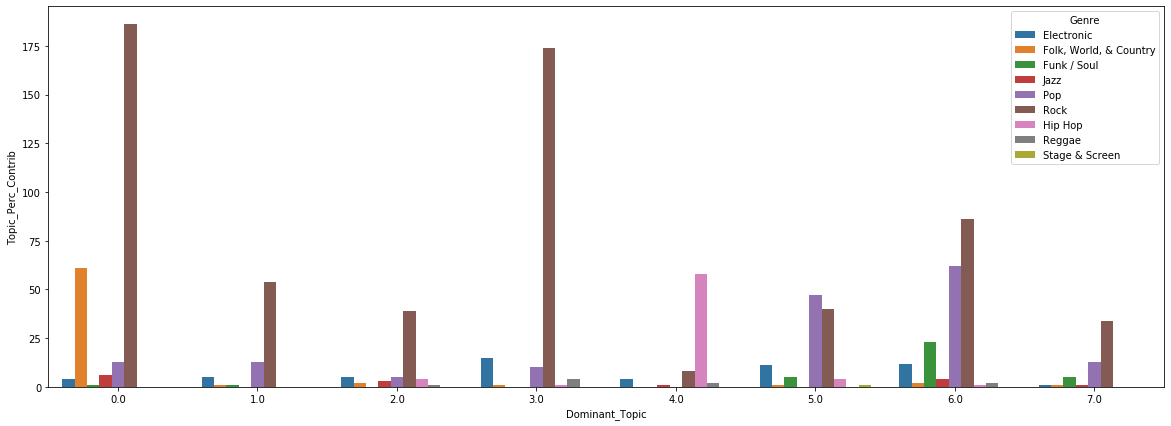

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,7))
sns.barplot(x=topics.Dominant_Topic, y="Topic_Perc_Contrib", hue='Genre',data=topics)
plt.savefig('../../images/Bilder_Abschlusspräsi/topic_modelling_verteilung')

In [68]:
for i, v in Counter(df_dominant_topic[df_dominant_topic.Genre=='Hip Hop'].Dominant_Topic).items():
    print(f"Topic {i} tritt {v} mal auf")

Topic 4.0 tritt 58 mal auf
Topic 5.0 tritt 4 mal auf
Topic 2.0 tritt 4 mal auf
Topic 3.0 tritt 1 mal auf
Topic 6.0 tritt 1 mal auf


### Repräsentativstes Dokument pro Topic

In [70]:
import numpy as np
representative = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    representative = pd.concat([representative, grp.sort_values(['Perc_Contribution']).head(1)], axis=0)
representative.reset_index(drop=True, inplace=True)

representative.columns = [
   'Topic_Number', "Contribution_Perc", "Keywords", "Text", "Genre", "Artist"
]
representative

,Topic_Number,Contribution_Perc,Keywords,Text,Genre,Artist
0,0.0,0.2709,"roll, went, road, blue, sweet, rain, money, sa...",helpless homeless okay very damn child drum be...,Rock,Ramones
1,1.0,0.2395,"la, christmas, wanna, sing, die, nah, line, so...",high wrong wrong plain plain safe wrong black ...,Rock,Nirvana
2,2.0,0.2678,"because, dance, jump, 'bout, brother, 'em, -, ...",magic sorry perfect other hour wand time heart...,Rock,Prince
3,3.0,0.2810,"die, blood, dead, death, war, burn, fear, hell...",very red mad very storm threatenin life today ...,Rock,Grand Funk Railroad
4,4.0,0.4147,"nigga, ya, fuck, shit, bitch, niggas, money, y...",distinguished good hard classic rare same mad ...,Hip Hop,OutKast
5,5.0,0.2847,"wanna, na, ya, let's, ooh, la, ah, wish, [vers...",crazee wild crazee crazee whiskey money drop l...,Rock,Quiet Riot
6,6.0,0.2493,"na, lord, forever, waiting, sing, dance, lonel...",desperate desperate own only desperate despera...,Rock,Fall Out Boy
7,7.0,0.3504,"ooh, da, -, dance, wanna, rock, doo, honey, ya...",high tall cute uptown chic sweater girl sweate...,Rock,Lloyd Cole


In [71]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer(max_features=2000, min_df=1, max_df=300, stop_words='english')
cv.fit(representative['Keywords'])

results = cv.transform(representative['Keywords'])

features = cv.get_feature_names()

In [72]:
df_res = pd.DataFrame(results.toarray(), columns=features)
# df_res = df_res.set_index(df.genre1)
df_res

,ah,alive,ass,bitch,blood,blue,bout,brother,burn,christmas,...,sweet,verse,waiting,wanna,war,went,wish,woman,ya,yo
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
5,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [73]:
df_res.loc['sum']=df_res.sum()
df_res = df_res.div(df_res.sum(axis=1), axis=0)
df_res.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)
df_res

,ya,wanna,dance,lord,sing,money,na,la,em,burn,...,fuck,hell,honey,hope,jump,kill,kiss,let,alive,yo
0,0.000000,0.000000,0.000000,0.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,...,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000
4,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,...,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
5,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.000000
6,0.000000,0.000000,0.111111,0.111111,0.111111,0.000000,0.111111,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.111111,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sum,0.040000,0.040000,0.040000,0.026667,0.026667,0.026667,0.026667,0.026667,0.026667,0.026667,...,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333


In [88]:
genre = df_res[df_res.index==7]
genre.loc['sum']=genre.sum()
genre = genre.div(genre.sum(axis=1), axis=0)
genre.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)
genre

/home/teresa/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,ya,honey,wanna,da,ready,ooh,rock,doo,dance,dead,...,saw,lonely,somebody,sweet,verse,waiting,war,went,wish,yo
7,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


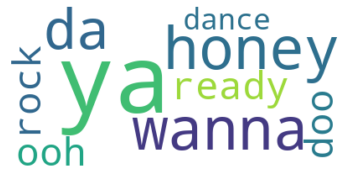

In [89]:
from wordcloud import WordCloud

def makeImage(text, figname):
    wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(figname)
    plt.show()

text = genre.loc['sum']
# text = abba.any()
makeImage(text, "../../images/wordcloud_Topic7")